In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns;

In [ ]:
folder = input("Please give the folder path containing your hpxmp and openmp data:")

merged_hpxmp = open(folder+"/merged_hpxmp.csv","w+")
for line in open(folder+"/hpxmp_dense_vector_2th_run.csv"):
    merged_hpxmp.write(line)
for num in range(3,12):
    f = open(folder+"/hpxmp_dense_vector_"+str(num)+"th_run.csv")
    f.__next__() #skip the header
    for line in f:
        merged_hpxmp.write(line)
    f.close()
merged_hpxmp.close()

merged_openmp = open(folder+"/merged_openmp.csv","w+")    
for line in open(folder+"/openmp_dense_vector_2th_run.csv"):
    merged_openmp.write(line)
for num in range(3,12):
    f = open(folder+"/openmp_dense_vector_"+str(num)+"th_run.csv")
    f.__next__() #skip the header
    for line in f:
        merged_openmp.write(line)
    f.close()
merged_openmp.close()
                 

Please give the folder path containing your hpxmp and openmp data:../result_dense_vector_marv_noht_201811131552


In [3]:
hpxmp = pd.read_csv(folder+"/merged_hpxmp.csv")
openmp = pd.read_csv(folder+"/merged_openmp.csv")
hpxmp.head()

mfc/s  num_threads  vector_size
0   38.4453            1        50000
1   66.8267            2        50000
2   84.6796            3        50000
3  109.0060            4        50000
4  120.6500            5        50000

In [4]:
hpxmp_1_2 = hpxmp.groupby(['num_threads','vector_size']).mean()
hpxmp_1_2.head()
openmp_1_2 = openmp.groupby(['num_threads','vector_size']).mean()

In [5]:
hpxmp_1_2 = hpxmp_1_2.reset_index()
hpxmp_1_2.head()
openmp_1_2 = openmp_1_2.reset_index()

In [6]:
pivot_table_hpxmp = hpxmp_1_2.pivot('vector_size','num_threads','mfc/s')

In [7]:
pivot_table_openmp = openmp_1_2.pivot('vector_size','num_threads','mfc/s')

how many distinct thread do you have?16
how many vector size group do you have?200


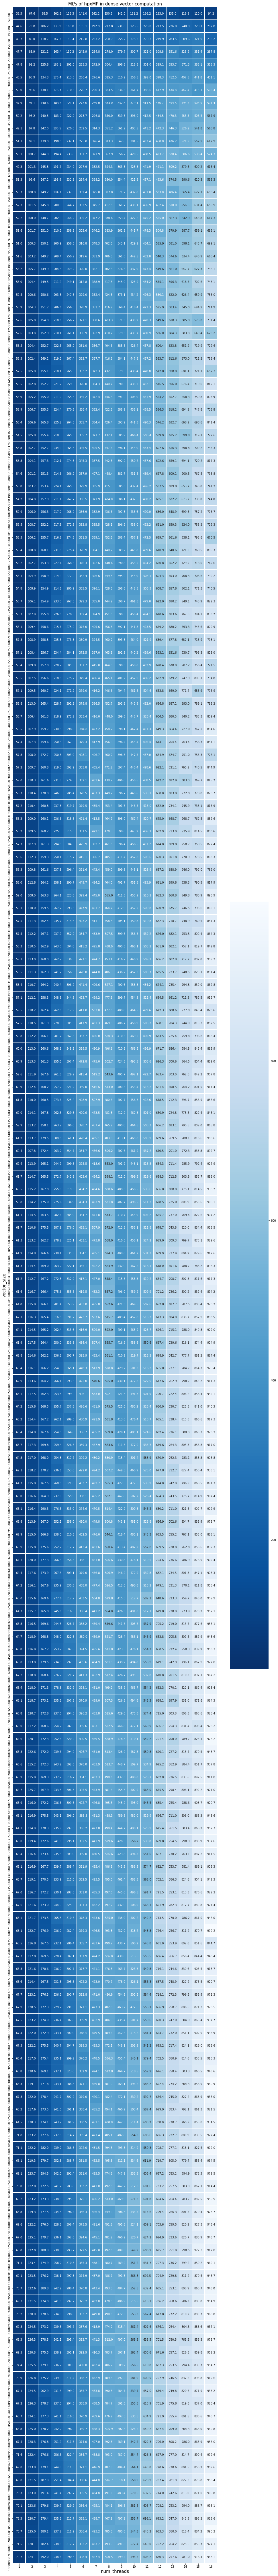

In [8]:
num_thr=int(input("how many distinct thread do you have?"))
num_vsz=int(input("how many vector size group do you have?"))
plt.figure(figsize=(num_thr,num_vsz))
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('Mf/s of hpxMP in dense vector computation',size = 15)
sns_plot_hpxmp = sns.heatmap(pivot_table_hpxmp,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')


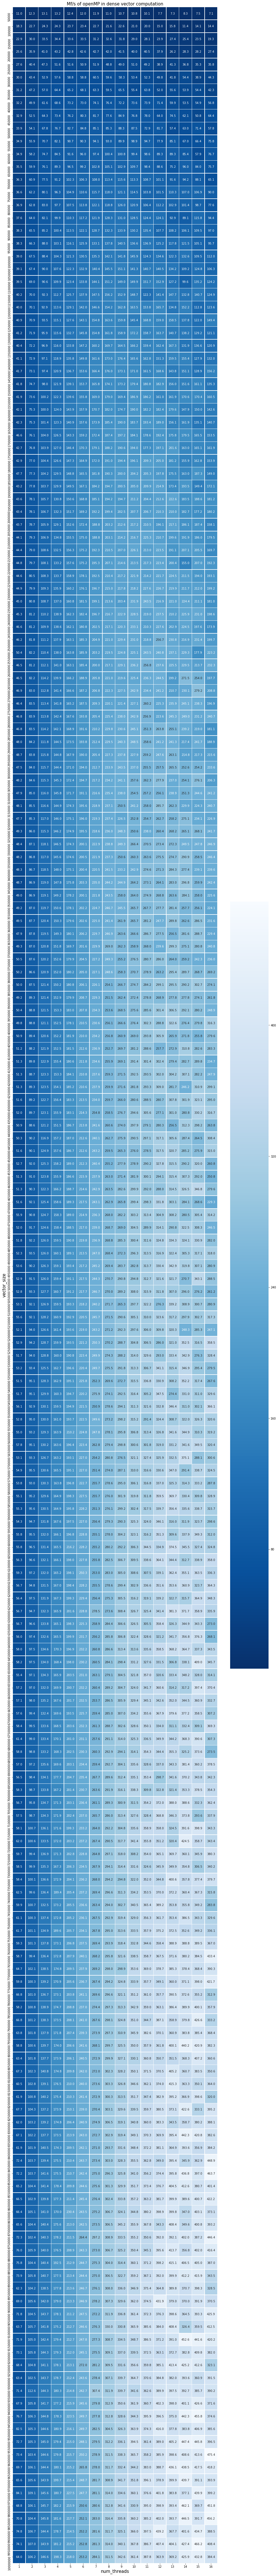

In [9]:
plt.figure(figsize=(num_thr,num_vsz))
pivot_table_openmp = openmp_1_2.pivot('vector_size','num_threads','mfc/s')
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('Mf/s of openMP in dense vector computation',size = 15)
sns_plot_openmp = sns.heatmap(pivot_table_openmp,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')

In [10]:
figure_hpxmp = sns_plot_hpxmp.get_figure()
figure_hpxmp.savefig(folder+"/hpxmp")
figure_openmp = sns_plot_openmp.get_figure()
figure_openmp.savefig(folder+"/openmp")

In [11]:
pivot_table_diff = pivot_table_hpxmp/pivot_table_openmp

In [12]:
pivot_table_diff.head(16)

num_threads        1         2         3         4          5          6   \
vector_size                                                                 
50000        3.495357  5.512277  6.771910  7.813886  10.376424  11.711898   
100000       2.433894  3.515132  4.362919  5.584007   6.869752   8.355373   
150000       1.998029  2.863395  3.540981  4.274909   5.514423   6.353345   
200000       1.865406  2.479280  2.955694  3.781585   4.443119   5.769057   
250000       1.732927  2.256220  2.659410  3.201519   3.894961   4.979438   
300000       1.617589  2.231735  2.548367  3.060648   3.632617   4.530383   
350000       1.601187  2.046690  2.421423  2.741521   3.229024   3.975114   
400000       1.486951  1.947872  2.282408  2.677527   3.021928   3.749282   
450000       1.527973  1.830083  2.185438  2.494954   2.915258   3.408156   
500000       1.449807  1.808991  2.094647  2.431578   2.660294   3.331695   
550000       1.465403  1.771616  1.965734  2.314372   2.559390   3.044811   
600000       1.434431  1.729137  1.928713  2.300854   2.552935   3.144485   
650000       1.389388  1.692732  1.916186  2.139728   2.434151   3.001605   
700000       1.414979  1.634533  1.898568  2.180990   2.276522   2.769954   
750000       1.384856  1.608744  1.862001  2.020971   2.264642   2.735560   
800000       1.417118  1.617342  1.755496  2.055798   2.276926   2.657970   

num_threads         7          8          9          10         11         12  \
vector_size                                                                     
50000        11.943912  13.665739  13.218866  13.955585  15.388693  17.240333   
100000        8.483494  10.077539  10.244230  10.647325  11.423524  14.274402   
150000        7.479801   8.241691   8.019626   9.488146   9.606534  11.726625   
200000        5.961794   6.619858   6.731564   7.514127   7.917612   8.154751   
250000        5.262187   6.231551   6.096435   6.254940   6.124075   8.451436   
300000        4.573070   5.294184   5.318903   6.679676   7.497897   8.000546   
350000        4.587754   5.441016   5.141833   6.524686   6.060228   8.038132   
400000        3.901285   4.360977   4.609311   5.152726   5.606729   6.117466   
450000        3.633537   4.509900   4.000444   5.155881   5.287037   6.785150   
500000        3.692516   4.116104   4.089552   4.613786   6.048466   5.779111   
550000        3.468755   4.012961   3.869835   3.856733   4.578504   5.916109   
600000        3.306863   3.564562   3.533676   4.228893   4.446189   5.529934   
650000        3.233490   3.752877   3.536840   3.877212   4.489778   5.541776   
700000        3.037404   3.350713   3.065358   3.721226   4.295971   4.881269   
750000        2.810098   3.365140   3.066128   3.824176   4.442556   4.956176   
800000        2.831031   3.515276   2.869922   3.623253   4.292546   4.122319   

num_threads         13         14         15         16  
vector_size                                              
50000        18.516815  14.400490  14.770461  13.332616  
100000       14.959618  21.011013  16.255677  14.113353  
150000       10.349233  12.212711  13.714914  12.338001  
200000       13.415260  11.495010  12.455080  10.518282  
250000        8.561748  10.098192  10.931366   9.928448  
300000        9.867240   7.484883  11.359980   9.059198  
350000        7.818338   8.204334   7.587434  11.943664  
400000        7.593265   9.241858   9.212051   8.832469  
450000        6.317238   7.788405   9.972507   8.825637  
500000        7.776842   8.369660   7.592528   9.846211  
550000        5.010664   7.785055   8.329007   8.148405  
600000        5.824601   5.932122   9.258780   6.836857  
650000        6.776074   6.039220   7.145315   8.146082  
700000        6.269108   6.269570   6.924007   9.138675  
750000        4.409480   5.283547   5.818133   7.564599  
800000        4.956341   5.487432   6.396139   8.499946

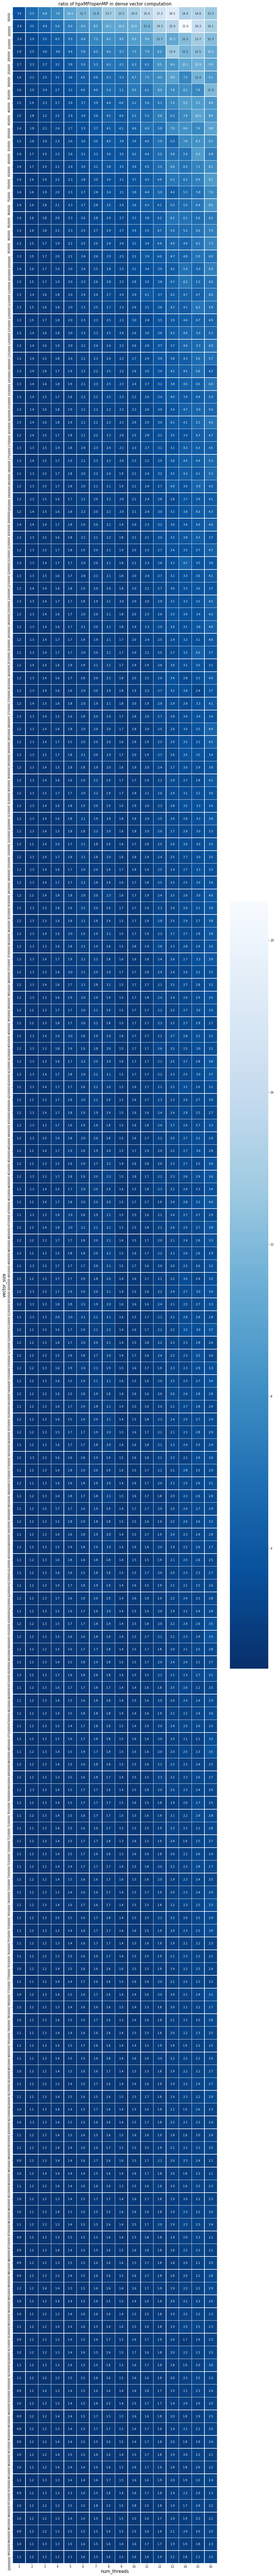

In [13]:
plt.figure(figsize=(num_thr,num_vsz))
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('ratio of hpxMP/openMP in dense vector computation',size = 15)
sns_plot_diff = sns.heatmap(pivot_table_diff,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')

In [14]:
figure_diff = sns_plot_diff.get_figure()
figure_diff.savefig(folder+"/hpxmp_openmp_diff")